<p style="text-align: center">
<h1>
Data Visualizations
</h1>
Discovering as much as I can regarding the data set
</p>

<br>
<img src="C1Banner.png"/>



In [89]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import numpy as np

In [90]:
plt.figure(figsize=(10,6))
style.use('seaborn-poster')
sns.set_style('ticks')

<Figure size 720x432 with 0 Axes>

In [91]:
df_paths = ['Data/pickles/clean_data/{}'.format(file) for file in os.listdir('Data/pickles/clean_data')]

df = pd.concat([
    pd.read_pickle(df_paths[0]),
    pd.read_pickle(df_paths[1])],
axis=1)

## General Idea of Numeric Data Distribution

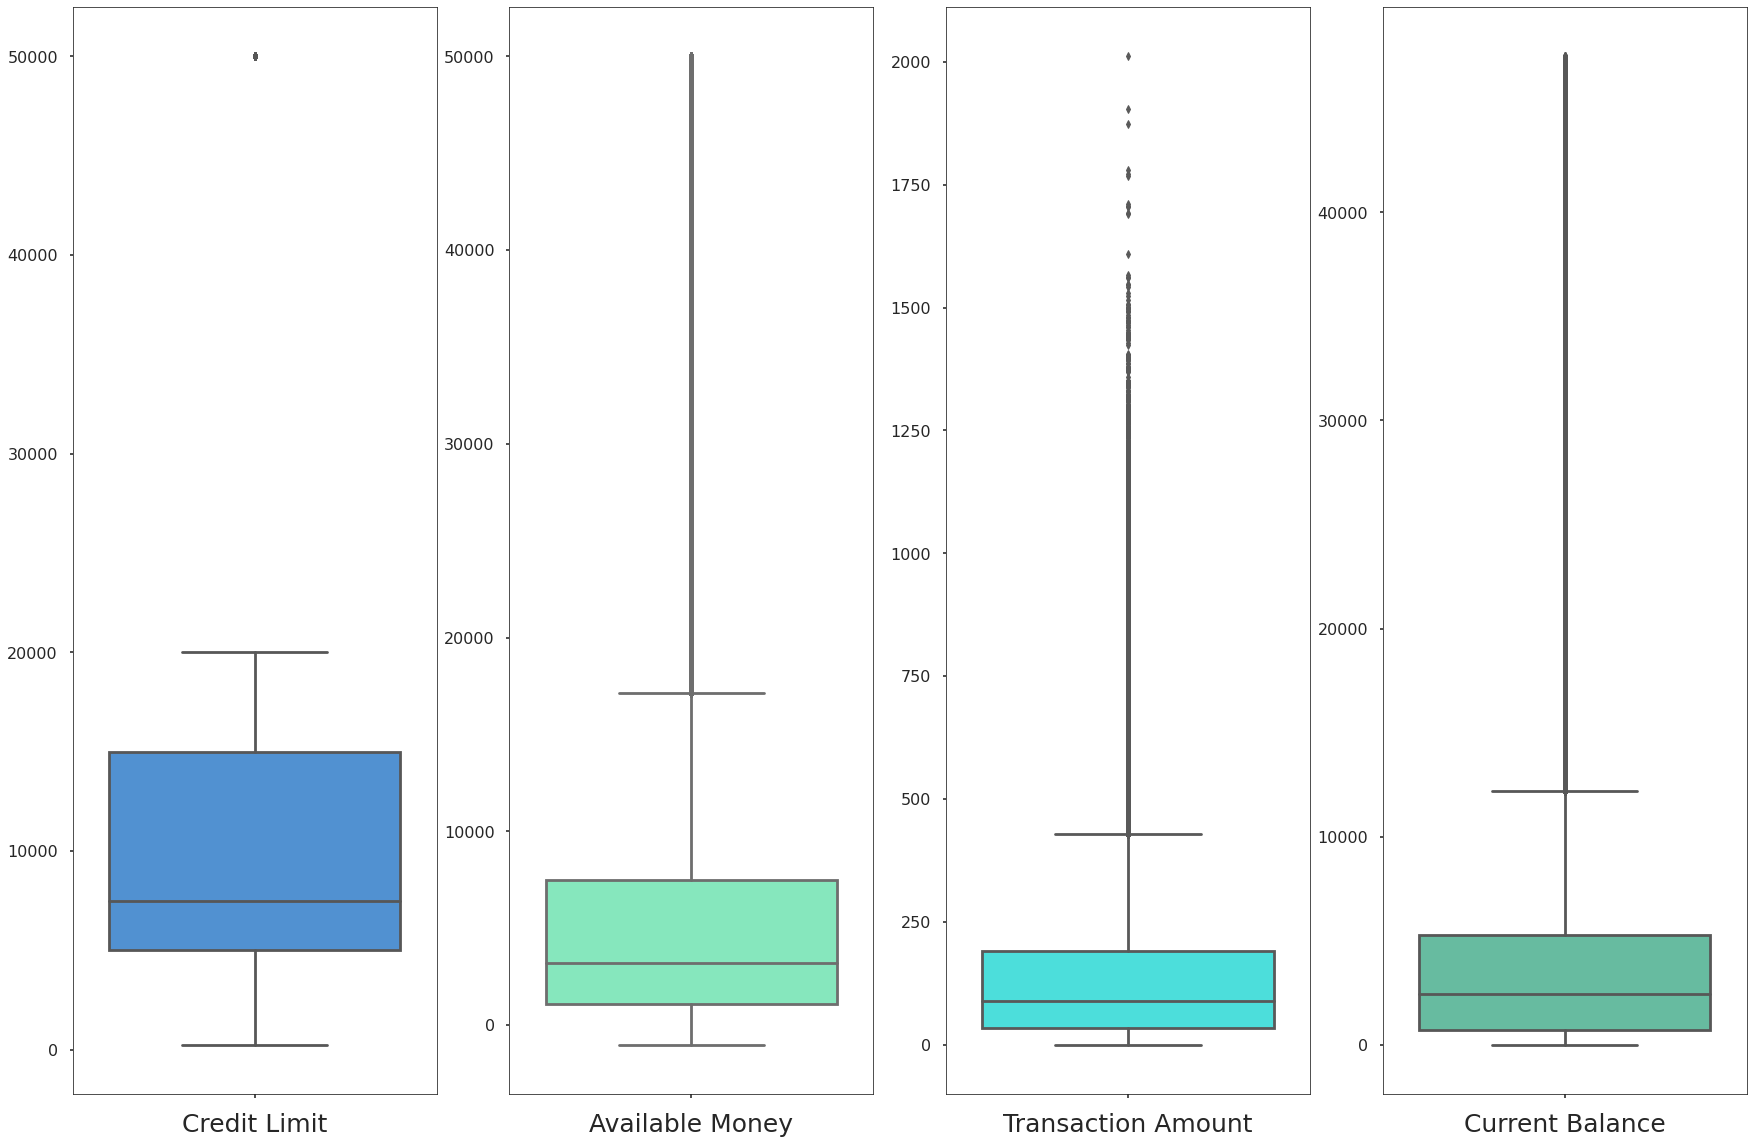

In [92]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(30,20))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']

for i in range(len(numeric_cols)):
    sns.boxplot(data=df, x=numeric_cols[i], ax=ax[i], color=colors[i], orient='v')
    ax[i].set_xlabel(neat_cols[i], fontsize=25)
    ax[i].set_ylabel('')

### Credit Limit:
Some really far outliers at credit limit of 50,000
Also does not seem to have a normal distribution
### Available Money:
Appears to be right skewed
Interesting to see that available money is so low, I would've expected the general savings to be higher
More outliers as money increases, which makes sense
### Transaction Amount
Right skewed
Seems that the general transaction amount is typically low, which makes sense
Surprised to see that the maximum transaction amount in this data set is ~2000 -- I expected some larger numbers
### Current Balance
Right skewed
Really interesting again that the usual balance for a bank customer is so low.

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20,15))

numeric_cols = ['creditLimit', 'availableMoney', 'transactionAmount', 'currentBalance']
neat_cols = ['Credit Limit', 'Available Money', 'Transaction Amount', 'Current Balance']
colors = ['#3C91E6', '#76F7BF', '#34F6F2', '#59C9A5']
counter = 0

for i in range(2):
    for j in range(2):
        sns.distplot(df[numeric_cols[counter]], ax=ax[i][j], color=colors[counter])
        ax[i][j].set_xlabel(neat_cols[counter], fontsize=20)
        ax[i][j].set_ylabel('')
        counter+=1

fig.suptitle('Numeric Data Distribution', fontsize=22)
fig.subplots_adjust(top=0.95)

### Credit Limit:
The data is messier than initially expected. The distribution is multimodal and a simple transformation will not work.
Ideally if I decide to use this feature, an easy solution would be to use a model that doesn't assume gaussian.

Makes sense that the distribution is multimodal since it seems like these limit values are predetermined are not random
### Available Money:
Extremely right skewed
Seems like an important feature that would probably correlate with many features within in the data set, and a simple boxcox transformation can easily normalize this distribution. I can also remove the outliers at 50000 as well -- if needed.
### Transaction Amount
Right skewed
Behavior of the distribution is really satisfying.
Not much else to mention
### Current Balance
Right skewed
Really interesting again that the usual balance for a bank customer is so low.